# FULL FM WAVE : 

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy.integrals.trigonometry import trigintegrate
from sympy.abc import x,t
from sympy import Symbol,sin,cos,tan,cot,sec,csc

In [238]:
#Taking Inputs from User
mod_func=input("Enter the modulating function in terms of t: ") # eg-(sin(2*math.pi*t))
dev_ratio=input("Enter the deviation ratio: ")
carrier_freq=input("Enter the carrier frequency: ")

Enter the modulating function in terms of t: sin(2*math.pi*t/10)
Enter the deviation ratio: 50
Enter the carrier frequency: 1000


In [60]:
#Return array of amplitudes of modulating wave .
def get_modulating_amplitude(time,func):
    amplitude=[]
    for t in time:
        amplitude.append(eval("np."+func))
    return amplitude

# FM: A*cos(wt + k* ∫m(t)dt)

In [266]:
#Plotting modulating function\
def plot_func(amplitude,time,ti):
    horiz_line_data=np.array([0 for i in range(len(time))])
    plt.plot(time,amplitude,label=ti)
    plt.plot(time,horiz_line_data,'k')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(ti)
    plt.show()

In [201]:
#amplitudes of modulating wave
time =np.arange(start=0,stop=10,step=0.005)
amplitude=get_modulating_amplitude(time,mod_func)

In [239]:
#Max Amplitude of modulating wave
max_amp_modulating=max(amplitude)
print("max amplitude of modulating wave: ",max_amp_modulating)

max amplitude of modulating wave:  1.0


In [240]:
#calculating Kf
s=mod_func
text=s[s.find('(')+1:s.find(')')]
text=text+'/(2*math.pi*t)'
freq_modulating=eval(text)
print("frequency of modulating function is: ",freq_modulating)
Kf=float(dev_ratio)*(2*math.pi*freq_modulating)/max_amp_modulating
print("Kf of the function: ",Kf)

frequency of modulating function is:  0.100000000000000
Kf of the function:  31.4159265358979


In [241]:
def get_FM_amplitudes(time,integrate_mod_func):
    FM_amplitudes=[]
    f1="2*math.pi*float(carrier_freq)*t"                #f1=cos(2*pi*fc*t)
    for t in time:
        ans=eval(f1)+Kf*eval(str(integrate_mod_func))   #ans=Wc*t+Kf*∫m(t)dt
        #print(ans)
        FM_amp=np.cos(float(ans))                       #cos(Wc*t+Kf*∫m(t)dt)
        #print(FM_amp)
        FM_amplitudes.append(FM_amp)
    return FM_amplitudes

In [242]:
integrate_mod_func=trigintegrate(eval(mod_func),t)      #∫m(t)dt
FM_amplitudes=get_FM_amplitudes(time,integrate_mod_func)

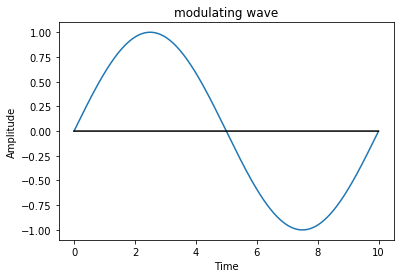

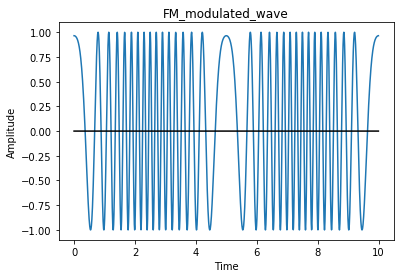

In [270]:
#plotting modulating wave
plot_func(amplitude,time,"modulating wave")
plot_func(FM_amplitudes,time,"FM_modulated_wave")